In [2]:
import glob
import numpy as np
import pandas as pd 
import os

In [3]:
os.listdir('train-set/')

['ba',
 'ca',
 'da',
 'ga',
 'ha',
 'ja',
 'ka',
 'la',
 'ma',
 'na',
 'nga',
 'nya',
 'pa',
 'ra',
 'sa',
 'ta',
 'wa',
 'ya']

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [6]:
import matplotlib.pyplot as plt

def plot_gambar(gmbr, labels=None, rows=1, figsize=(20,8), fontsize=14):
    figure = plt.figure(figsize=figsize)
    num_cols = max(1,len(gmbr) // rows-1)
    has_labels = False
    # checking if labels is a numpy array
    if type(labels).__module__ == np.__name__:
        has_labels=labels.any()
    elif labels:
        has_labels=True
    for i in range(len(gmbr)):
        subfig = figure.add_subfig(rows, num_cols+1, i+1)
        # axis off, but leave a bounding box
        plt.tick_params(
            axis='both',
            which='both',
            bottom='off',
            top='off',
            left='off',
            right='off',
            labelbottom='off',
            labelleft='off')
        # plot labels if present
        if has_labels:
            subfig.set_title(labels[i], fontsize=fontsize)
        plt.imshow(gmbr[i][:,:,0])
        
    plt.show()

In [10]:
def persiapan_dataset(path):
    x_latih=[]
    y_latih=[]
    kode = 0
    for labels in os.listdir(path):
        if labels == 'ka':
            kode = 0
        elif labels == 'ca':
            kode = 1
        elif labels == 'ta':
            kode = 2
        elif labels == 'pa':
            kode = 3
        elif labels == 'ya':
            kode = 4
        elif labels == 'wa':
            kode = 5
        elif labels == 'ga':
            kode = 6
        elif labels == 'ja':
            kode = 7
        elif labels == 'da':
            kode = 8
        elif labels == 'ba':
            kode = 9
        elif labels == 'ra':
            kode = 10
        elif labels == 'sa':
            kode = 11
        elif labels == 'nga':
            kode = 12
        elif labels == 'nya':
            kode = 13
        elif labels == 'na':
            kode = 14
        elif labels == 'ma':
            kode = 15
        elif labels == 'la':
            kode = 16
        elif labels== 'ha':
            kode = 17
            
        semua_images_path = glob.glob(path+labels+'/*.jpg')
        for img_path in semua_images_path :
                img=load_img(img_path, target_size=(64,64))
                img=img_to_array(img)
                img=img/255.0
                x_latih.append(img)
                y_latih.append(kode)
    return np.array(x_latih),np.array(y_latih)

In [11]:
x_latih, y_latih = persiapan_dataset('train-set/')

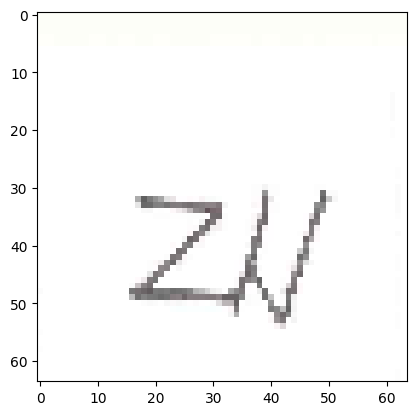

In [12]:
img = x_latih[251]
imgplot = plt.imshow(img)
plt.show()

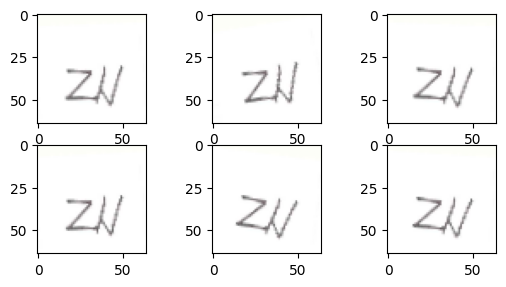

In [13]:
from tensorflow.keras.preprocessing.image import random_shift, random_shear, random_zoom
from numpy import expand_dims

img = x_latih[251]
data = img_to_array(img)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(rotation_range=10)
it = datagen.flow(samples, batch_size=1)
for i in range(6):
    plt.subplot(330 + 1 + i)
    batch = it.next()
    image = batch[0]
    plt.imshow(image)
plt.show()

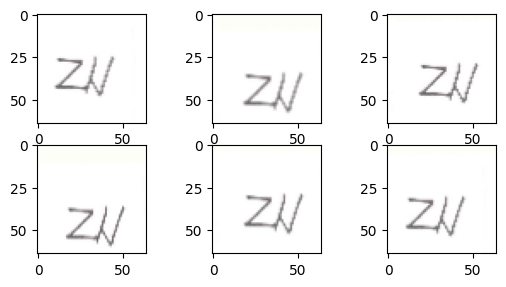

In [14]:
from numpy import expand_dims
img = x_latih[251]
data = img_to_array(img)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1)
it = datagen.flow(samples, batch_size=1)
for i in range(6):
    plt.subplot(330 + 1 + i)
    batch = it.next()
    image = batch[0]
    plt.imshow(image)
plt.show()

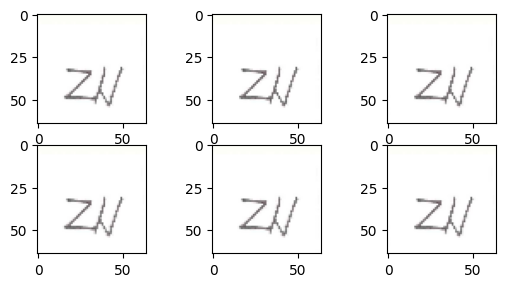

In [15]:
from numpy import expand_dims
img = x_latih[251]
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(shear_range=0.9)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(6):
    # define subplot
    plt.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0]
    # plot raw pixel data
    plt.imshow(image)
# show the figure
plt.show()

In [16]:
print("shape x_latih",x_latih.shape)
print("shape y_latih",y_latih.shape)

shape x_latih (252, 64, 64, 3)
shape y_latih (252,)


In [17]:
paths=glob.glob('train-set/*')
l=len('train-set/')
labels=[]
for path in paths:
    labels.append(path[l:])
    print(labels)

['ba']
['ba', 'ca']
['ba', 'ca', 'da']
['ba', 'ca', 'da', 'ga']
['ba', 'ca', 'da', 'ga', 'ha']
['ba', 'ca', 'da', 'ga', 'ha', 'ja']
['ba', 'ca', 'da', 'ga', 'ha', 'ja', 'ka']
['ba', 'ca', 'da', 'ga', 'ha', 'ja', 'ka', 'la']
['ba', 'ca', 'da', 'ga', 'ha', 'ja', 'ka', 'la', 'ma']
['ba', 'ca', 'da', 'ga', 'ha', 'ja', 'ka', 'la', 'ma', 'na']
['ba', 'ca', 'da', 'ga', 'ha', 'ja', 'ka', 'la', 'ma', 'na', 'nga']
['ba', 'ca', 'da', 'ga', 'ha', 'ja', 'ka', 'la', 'ma', 'na', 'nga', 'nya']
['ba', 'ca', 'da', 'ga', 'ha', 'ja', 'ka', 'la', 'ma', 'na', 'nga', 'nya', 'pa']
['ba', 'ca', 'da', 'ga', 'ha', 'ja', 'ka', 'la', 'ma', 'na', 'nga', 'nya', 'pa', 'ra']
['ba', 'ca', 'da', 'ga', 'ha', 'ja', 'ka', 'la', 'ma', 'na', 'nga', 'nya', 'pa', 'ra', 'sa']
['ba', 'ca', 'da', 'ga', 'ha', 'ja', 'ka', 'la', 'ma', 'na', 'nga', 'nya', 'pa', 'ra', 'sa', 'ta']
['ba', 'ca', 'da', 'ga', 'ha', 'ja', 'ka', 'la', 'ma', 'na', 'nga', 'nya', 'pa', 'ra', 'sa', 'ta', 'wa']
['ba', 'ca', 'da', 'ga', 'ha', 'ja', 'ka', 'la', 'ma

In [18]:
x_val, y_val = persiapan_dataset('test-set/')

In [19]:
print("shape x_val",x_val.shape)
print("shape y_val",y_val.shape)

shape x_val (107, 64, 64, 3)
shape y_val (107,)


In [20]:
def get_classKode(class_code):
    labels = {0:'ka', 1:'ca', 2:'ta', 3:'pa', 4:'ya', 5:'wa', 6:'ga', 7:'ja', 8:'da',
              9:'ba', 10:'ra', 11:'sa', 12:'nga', 13:'nya', 14:'na', 15:'ma',
              16:'la', 17:'ha'}
    return labels[class_code]

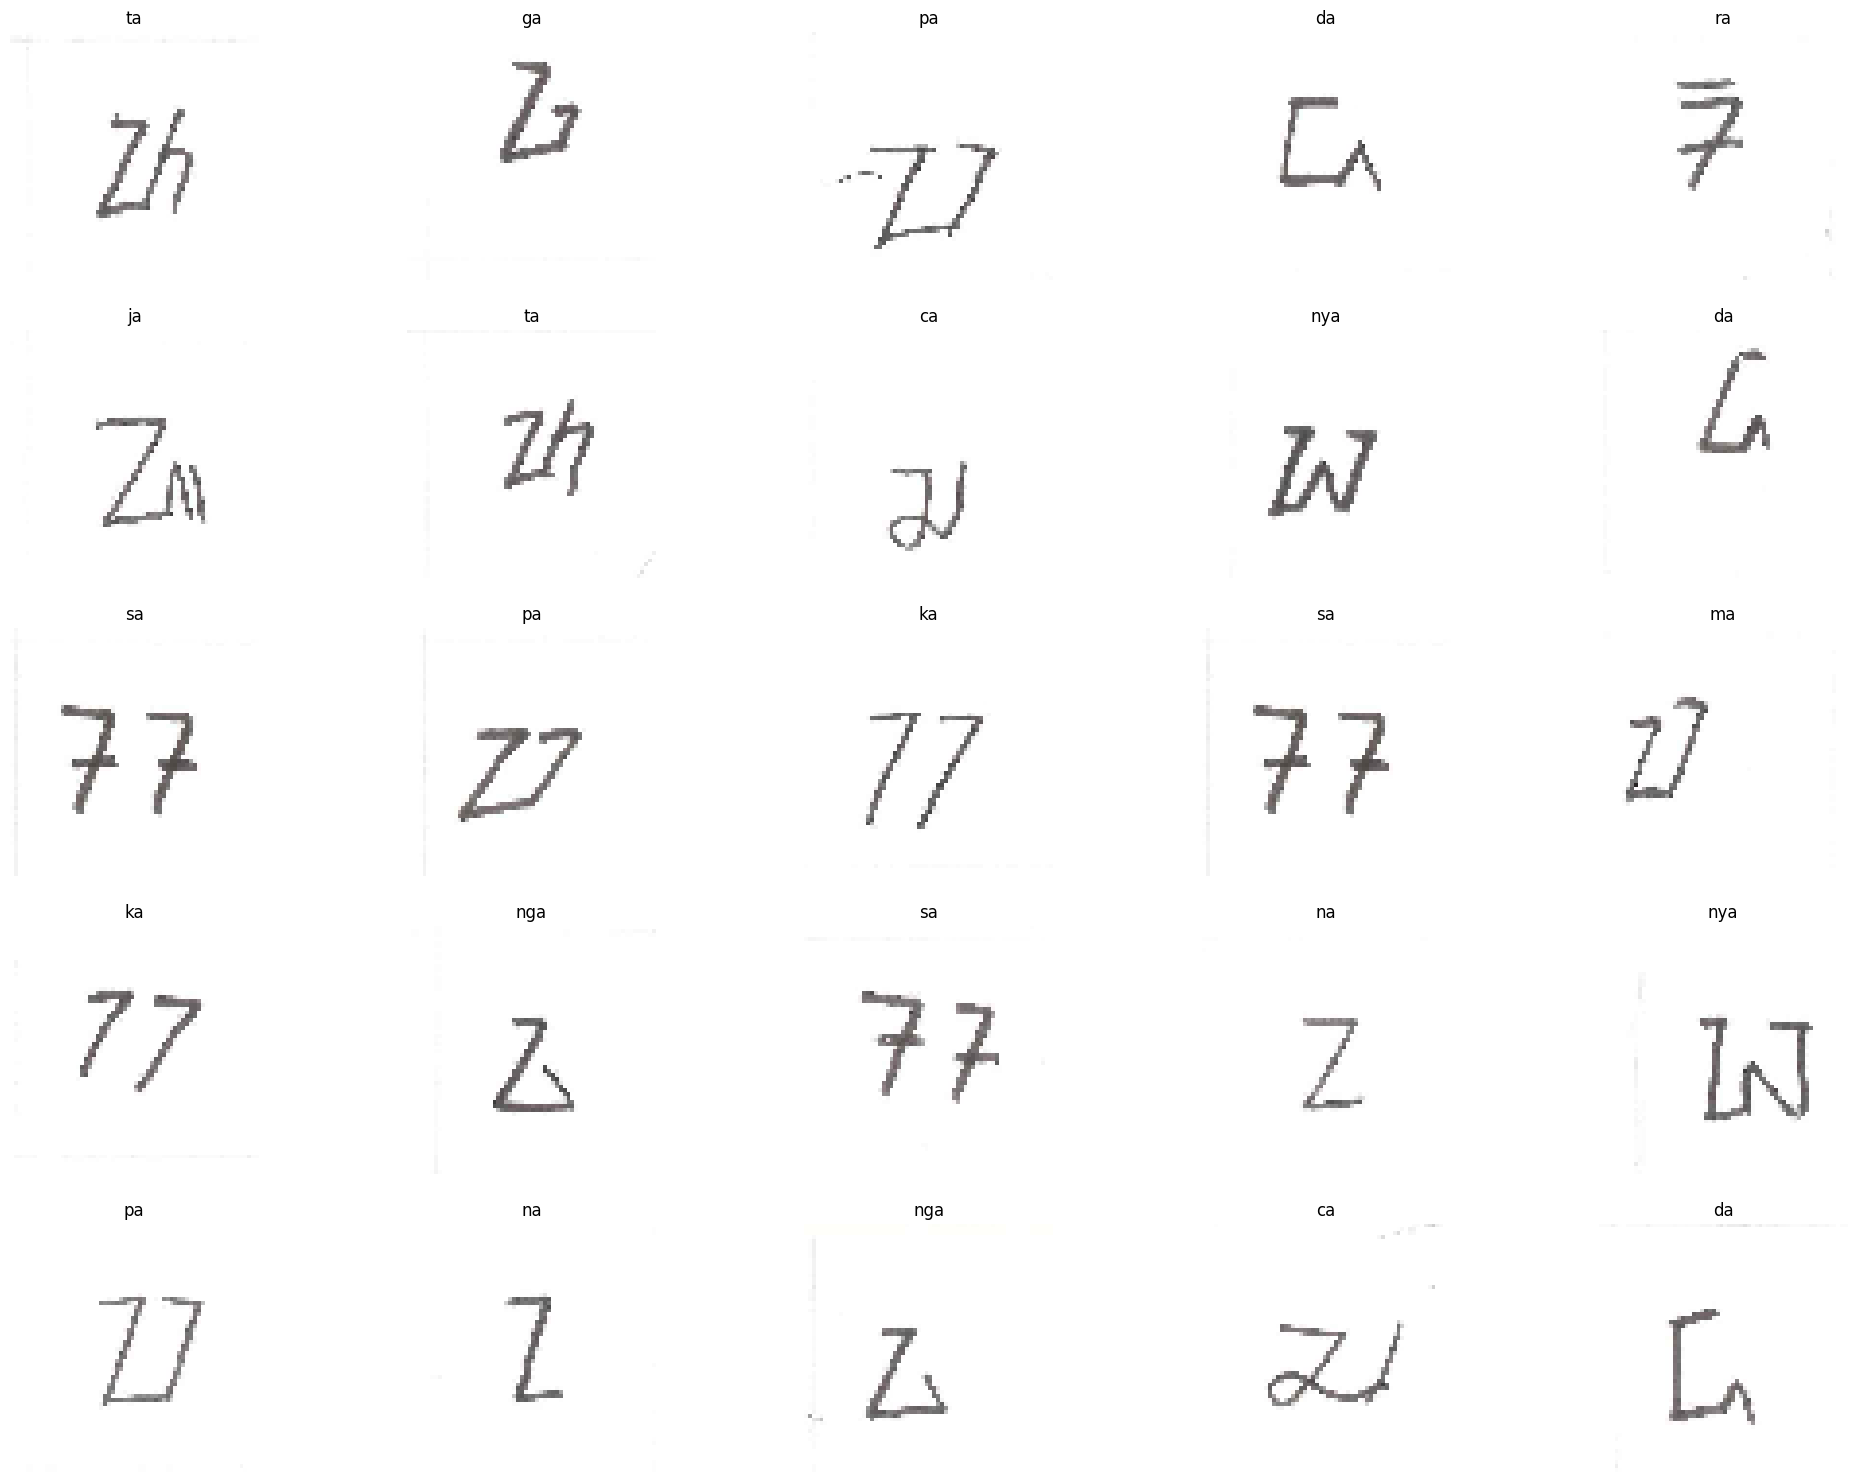

In [21]:
import matplotlib.pyplot as plt
from random import randint
import matplotlib.pyplot as plt
f,ax = plt.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for a in range(0,5,1):
    for b in range(0,5,1):
        rnd_number = randint(0,len(x_latih))
        ax[a,b].imshow(x_latih[rnd_number])
        ax[a,b].set_title(get_classKode(y_latih[rnd_number]))
        ax[a,b].axis('off')


In [26]:
import os
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.optimizers.legacy import Adam

weights_file = 'inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(weights_file)

for layer in pre_trained_model.layers:
     layer.trainable = False
        
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 74, 74, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization_94 (BatchN  (None, 74, 74, 32)  96          ['conv2d_94[0][0]']              
 ormalization)                                                                                    
                                                                                       

In [27]:
last_layer = pre_trained_model.get_layer('mixed4')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

x = layers.Flatten()(last_output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.2)(x)                  
x = layers.Dense(18, activation='softmax')(x)           

model = Model(pre_trained_model.input, x) 

model.compile(optimizer = Adam(lr=0.0001), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])



last layer output shape:  (None, 7, 7, 768)


c:\Users\dhea\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [28]:
from keras.preprocessing.image import ImageDataGenerator
import dataaug

datagen = ImageDataGenerator(
        rotation_range=30,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.3,
        horizontal_flip=False,
        preprocessing_function=lambda x: dataaug.elastic_transform(x, alpha_range=8, sigma=3),
        fill_mode='nearest')

In [29]:
model.fit(datagen.flow(x_latih, y_latih, batch_size=15),validation_data=(x_val,y_val),
          steps_per_epoch=len(x_latih) / 15, epochs=15)

Epoch 1/15


InvalidArgumentError: Graph execution error:

Detected at node 'model_1/dense_2/Relu' defined at (most recent call last):
    File "c:\Users\dhea\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\dhea\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "c:\Users\dhea\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\dhea\AppData\Local\Programs\Python\Python39\lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "c:\Users\dhea\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelapp.py", line 725, in start
      self.io_loop.start()
    File "c:\Users\dhea\AppData\Local\Programs\Python\Python39\lib\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\dhea\AppData\Local\Programs\Python\Python39\lib\asyncio\base_events.py", line 596, in run_forever
      self._run_once()
    File "c:\Users\dhea\AppData\Local\Programs\Python\Python39\lib\asyncio\base_events.py", line 1890, in _run_once
      handle._run()
    File "c:\Users\dhea\AppData\Local\Programs\Python\Python39\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\dhea\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "c:\Users\dhea\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "c:\Users\dhea\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell
      await result
    File "c:\Users\dhea\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "c:\Users\dhea\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "c:\Users\dhea\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\dhea\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "c:\Users\dhea\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "c:\Users\dhea\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\dhea\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\dhea\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\dhea\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\dhea\AppData\Local\Temp\ipykernel_816\3716046616.py", line 1, in <module>
      model.fit(datagen.flow(x_latih, y_latih, batch_size=15),validation_data=(x_val,y_val),
    File "c:\Users\dhea\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\dhea\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\dhea\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "c:\Users\dhea\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\dhea\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "c:\Users\dhea\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1050, in train_step
      y_pred = self(x, training=True)
    File "c:\Users\dhea\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\dhea\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 558, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\dhea\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\dhea\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\dhea\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\dhea\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\dhea\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\dhea\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\dhea\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\dhea\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\dhea\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\layers\core\dense.py", line 255, in call
      outputs = self.activation(outputs)
    File "c:\Users\dhea\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\activations.py", line 317, in relu
      return backend.relu(
    File "c:\Users\dhea\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\backend.py", line 5396, in relu
      x = tf.nn.relu(x)
Node: 'model_1/dense_2/Relu'
Matrix size-incompatible: In[0]: [15,3072], In[1]: [37632,512]
	 [[{{node model_1/dense_2/Relu}}]] [Op:__inference_train_function_17618]

In [22]:
import matplotlib.pyplot as plt
from random import randint
import matplotlib.pyplot as plt

history_dict = model.history
# plt.plot(model.history['acc'])
# plt.plot(model.history['val_acc'])
acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# plt.plot(model.history['loss'])
# plt.plot(model.history['val_loss'])
loss = history_dict['loss']
val_loss = history_dict['val_loss']
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

TypeError: 'History' object is not subscriptable

In [ ]:
# def pred_dataset(path):
#     x_train=[]
#     all_images_path=glob.glob(path+'/*.jpg')
#     for img_path in all_images_path :
#             img=load_img(img_path, target_size=(150,150))
#             img=img_to_array(img)
#             img=img/255.0
#             x_train.append(img)
#     return np.array(x_train)

# pred_img = pred_dataset('pred/aPredic/')
# pred_img.shape

In [ ]:
# predictions = model.predict(pred_img)

In [ ]:
# def get_classlabel(class_code):
#     labels = {0:'ka', 1:'ca', 2:'ta', 3:'pa', 4:'ya', 5:'wa', 6:'ga', 7:'ja', 8:'da',
#               9:'ba', 10:'ra', 11:'sa', 12:'nga', 13:'nya', 14:'na', 15:'ma', 16:'la', 17:'ha'}
#     classl = labels[class_code]
    
#     return classl

In [ ]:
# import matplotlib.gridspec as gridspec
# import matplotlib.pyplot as plt
# from random import randint
# fig = plt.figure(figsize=(30, 30))
# outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)

# for i in range(25):
#     inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
#     rnd_number = randint(0,len(pred_img))
#     pred_image = np.array([pred_img[rnd_number]])
#     x = np.argmax(model.predict(pred_image)[0])
#     for j in range(2):
#         if (j%2) == 0:
#             ax = plt.Subplot(fig, inner[j])
#             ax.imshow((pred_image[0]*255).astype(np.uint8))
#             ax.set_title(get_classlabel(x))
#             ax.set_xticks([])
#             ax.set_yticks([])
#             fig.add_subplot(ax)


# fig.show()